# Clustering
based on scipy2018-geospatial


## goals of the tutorial
- cluster of point
- cluster of polygons


### requirements
- python knowledge
- geopandas

### status 
*"Teamwork divides the tasks and multiplies the success"*

---

In [5]:
import os
import numpy as np
import libpysal as lp
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
%matplotlib inline


# Point Clustering

In [11]:
libraries_turin = gpd.read_file('data' + os.sep + 'libraries_turin.geojson')
libraries_turin = libraries_turin.to_crs(epsg=32632)

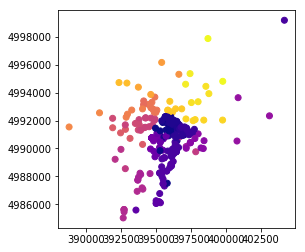

In [14]:
libraries_turin.plot('cap',cmap='plasma')

In [15]:
import sklearn.cluster as skc

In [16]:
coordinates = libraries_turin['geometry'].apply(lambda p: np.hstack(p.xy)).values
coordinates = np.vstack(coordinates)

Like other scikit estimators, they are split into an initialization/configuration call and a fit call.

Here, we'll use a local density-based scan clusterer, called DBSCAN. It works by fitting clusters of nearby points using the eps distance, which is the furthest distance at which points are considered to be in each other's clusters.

In [58]:
clusterer = skc.DBSCAN(eps=1000).fit(coordinates)

In [59]:
clusterer.components_

array([[ 393686.21266102, 4987739.05695614],
       [ 398006.13582993, 4991047.62874006],
       [ 395600.71783648, 4992115.00502201],
       [ 396166.19715139, 4992585.44023011],
       [ 396496.66746751, 4990776.1488995 ],
       [ 396465.60262229, 4991434.0039897 ],
       [ 395523.6284054 , 4990688.32288125],
       [ 395687.78371629, 4991938.45993556],
       [ 395826.38018856, 4992252.14571934],
       [ 394862.11179325, 4992583.39296556],
       [ 395231.86776573, 4991026.30287137],
       [ 392852.68398115, 4992239.39093971],
       [ 392453.20728337, 4991117.16425995],
       [ 395964.70300872, 4991181.41511352],
       [ 396579.9582435 , 4991755.95514291],
       [ 397446.123465  , 4990409.70795623],
       [ 396654.59095015, 4991550.9979057 ],
       [ 397446.123465  , 4990409.70795623],
       [ 394906.01975742, 4993679.8256953 ],
       [ 395794.99853451, 4992350.3545602 ],
       [ 395212.21423683, 4986179.7289814 ],
       [ 396177.94145446, 4991378.82672178],
       [ 3

In [60]:
clusterer.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  21,  22,  23,  24,  25,  26,  27,
        28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  84,  85,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 181, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 19

In [61]:
clusterer.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

In [62]:
nclusters = clusterer.p

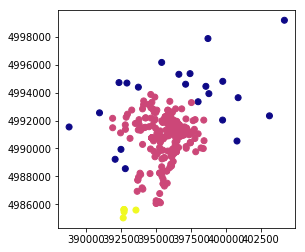

In [63]:
libraries_turin.assign(labels=clusterer.labels_).plot('labels', k=nclusters, cmap='plasma')

# Area Clusters

In [64]:
population_italian_regions = gpd.read_file('data'+ os.sep + 'geo_population_italian_regions.shp').to_crs(epsg=32632)

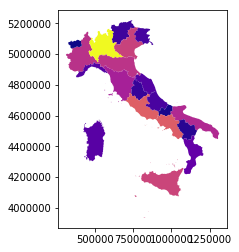

In [66]:
population_italian_regions.plot('Value', cmap='plasma')

In [67]:
population_cluster = skc.AgglomerativeClustering(n_clusters=3).fit(population_italian_regions[['Value']])

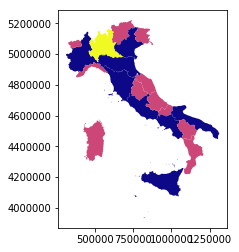

In [69]:
population_italian_regions.assign(labels=population_cluster.labels_).plot('labels', cmap='plasma')

## Contiguous clusters


In [71]:
rook_graph = lp.weights.Rook.from_dataframe(population_italian_regions)
%time

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


In [73]:
regions_populationclusters_sp = skc.AgglomerativeClustering(n_clusters=3,
                                                         connectivity=rook_graph.sparse).fit(population_italian_regions[['Value']])



/home/napo/dev/geospatial_bigdive/env/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


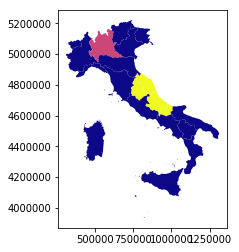

In [78]:
population_italian_regions.assign(labels=regions_populationclusters_sp.labels_).plot('labels', cmap='plasma')